In [1]:
import pymc as pm

lambda_ = pm.Exponential("posspm_param",1)

data_generator = pm.Poisson("data_generator", lambda_)
data_plus_one = data_generator + 1

print("Children of lambda_:")
print(lambda_.children, "\n")

print("Parents of data_generator:")
print(data_generator.parents, "\n")

print("Children of data_generator:")
print(data_generator.children)

Children of lambda_:
{<pymc.distributions.new_dist_class.<locals>.new_class 'data_generator' at 0x101c89358>} 

Parents of data_generator:
{'mu': <pymc.distributions.new_dist_class.<locals>.new_class 'posspm_param' at 0x10485ff98>} 

Children of data_generator:
{<pymc.PyMCObjects.Deterministic '(data_generator_add_1)' at 0x10d40a208>}


In [3]:
print("lambda_.value = ", lambda_.value)
print("data_generator.value =", data_generator.value)
print("data_plus_one.value =", data_plus_one.value)

lambda_.value =  1.4083827165447405
data_generator.value = 3
data_plus_one.value = 4


In [5]:
discrete_uni_var = pm.DiscreteUniform("discrete_uni_var", 0, 4)

In [6]:
discrete_uni_var??

In [7]:
lambda_1 = pm.Exponential("lambda_1", 1)
lambda_2 = pm.Exponential("lambda_2", 1)
tau = pm.DiscreteUniform("tau", lower=0, upper=10)

print("Initialized values...")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %3f" % tau.value)

lambda_1.random()
lambda_2.random()
tau.random()

print("After calling random()")
print("lambda_1.value = %.3f" % lambda_1.value)
print("lambda_2.value = %.3f" % lambda_2.value)
print("tau.value = %3f" % tau.value)

Initialized values...
lambda_1.value = 0.085
lambda_2.value = 0.402
tau.value = 5.000000
After calling random()
lambda_1.value = 1.506
lambda_2.value = 0.268
tau.value = 6.000000


(0, 8)

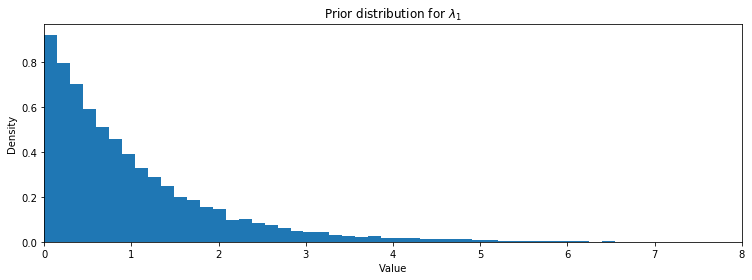

In [9]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")

plt.title("Prior distribution for $\lambda_1$")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0, 8)


In [11]:
data = np.array([10,5])
fixed_variable = pm.Poisson("fxd", 1, value=data, observed=True)
print("value: ", fixed_variable.value)
print("calling .random()")

fixed_variable.random()
print("value: ", fixed_variable.value)

value:  [10  5]
calling .random()
value:  [10  5]


In [12]:
data = np.array([10,25,15,20,35])
obs = pm.Poisson("obs", lambda_, value=data, observed=True)
print(obs.value)

[10 25 15 20 35]


In [13]:
model = pm.Model([obs, lambda_, lambda_1, lambda_2, tau])

In [14]:
tau = pm.rdiscrete_uniform(0, 80)
print(tau)

65


In [16]:
alpha = 1. /20.
lambda_1, lambda_2 = pm.rexponential(alpha, 2)
print(lambda_1, lambda_2)

2.28405185271 1.42921723276


In [17]:
lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]
print(lambda_)

[ 2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185
  2.28405185  2.28405185  2.28405185  2.28405185  2.28405185  1.42921723
  1.42921723  1.42921723  1.42921723  1.42921723  1.42921723  1.42921723
  1.42921723  1.42921723  1.42921723  1.42921723  1.42921723  1.42921723
  1.42921723  1.42921723]


In [18]:
data = pm.rpoisson(lambda_)
print(data)

[3 2 3 3 6 5 3 5 1 3 6 3 1 2 1 4 1 2 2 2 4 2 2 0 1 4 1 5 5 1 6 8 1 2 2 3 3
 4 2 3 4 5 4 1 4 3 4 2 3 2 4 3 4 2 0 3 2 3 4 2 3 0 3 4 1 0 3 0 0 0 1 1 1 0
 3 1 0 2 1 2]


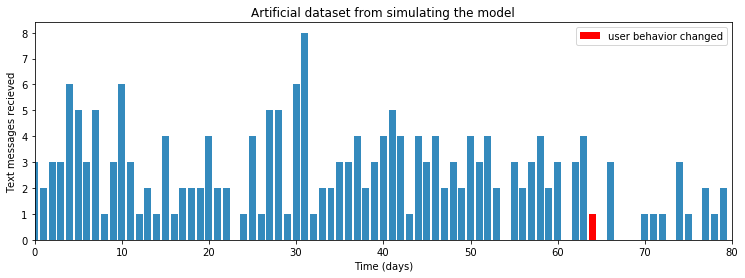

In [20]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau - 1, data[tau-1], color="r", label="user behavior changed")

plt.xlabel("Time (days)")
plt.ylabel("Text messages recieved")
plt.title("Artificial dataset from simulating the model")
plt.xlim(0, 80)
plt.legend()

In [21]:
!python

Python 3.5.2 |Anaconda 4.3.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> ^C
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyboardInterrupt
>>> 

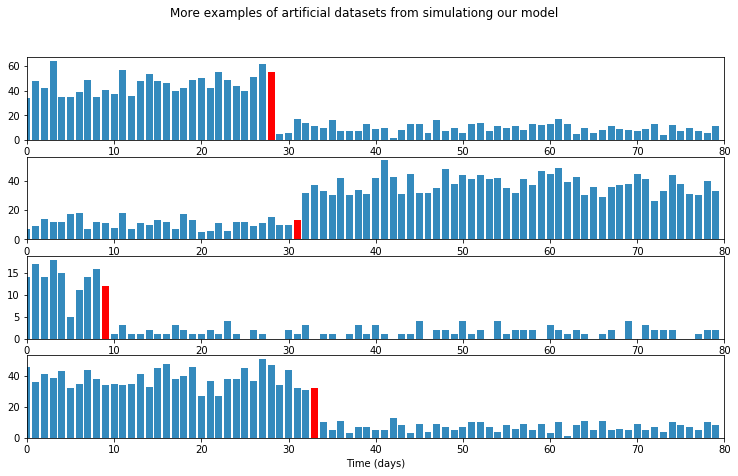

In [27]:
def plot_artificial_sms_dataset():
    tau = pm.rdiscrete_uniform(0,80)
    alpha = 1. / 20.
    lambda_1, lambda_2 = pm.rexponential(alpha, 2)
    lambda_ = np.r_[lambda_1 * np.ones(tau), lambda_2 * np.ones(80 - tau)]
    data = pm.rpoisson(lambda_)
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behavior changed")
    plt.xlim(0, 80)

figsize(12.5, 7)
plt.suptitle("More examples of artificial datasets from simulationg our model")
    
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.xlabel("Time (days)")
    plot_artificial_sms_dataset()
